# Import needed Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler 
from sklearn.linear_model import Lasso, LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
#checking the working directory
import os
#os.getcwd()
os.chdir('..\Health-Insurance-Cost-Prediction---Linear-Regression')

# Load Dataset

In [3]:
data = pd.read_csv('insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Data Processing

In [4]:
#allowing cell multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

male      676
female    662
Name: sex, dtype: int64

<Figure size 600x900 with 0 Axes>

([<matplotlib.patches.Wedge at 0x19fffb5da58>,
 [Text(-0.019722075269459984, 1.1998379222824498, 'Male'),
  Text(0.018078568997005343, -1.0998514287589123, 'Female')],
 [Text(-0.011504543907184991, 0.6999054546647624, '50.52%'),
  Text(0.009861037634730185, -0.5999189611412248, '49.48%')])

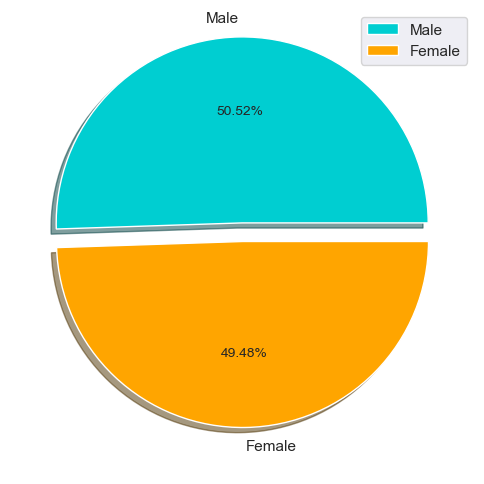

In [5]:
#GenderProportion
count = data.sex.value_counts()
count

#piechart
labels = ['Male', 'Female']
explode = [0.1, 0]
colors = ['darkturquoise', 'Orange']

plt.figure(figsize= (6,9), dpi =100,facecolor='white')
plt.pie(count, explode=[0.1, 0], labels= labels, colors= colors, autopct='%0.02f%%', shadow=True)
plt.legend()

<Figure size 1500x1000 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019FFFDE2AC8>,
      dtype=object)

<Figure size 1500x1000 with 0 Axes>

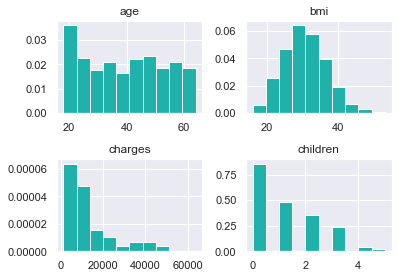

In [6]:
#visualise the distribution
plt.figure(figsize= (15,10), dpi =100,facecolor='white')
data.hist(bins=10,  density= True, color= 'lightseagreen')
plt.subplots_adjust(wspace = 0.3, hspace = 0.5, left  = 0.125, right = 0.9, bottom = 0.1, top = 0.9)

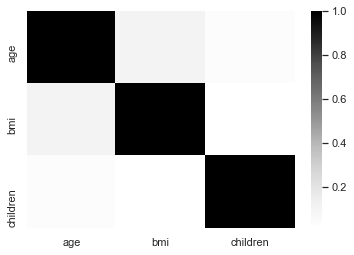

In [7]:
#using heatmap to check for independence of the independent variables
ind_v = data.iloc[:, :-1]
cor = ind_v.corr()
sns.heatmap(cor, cmap='Greys')

In [8]:
data.shape
data.describe()

(1338, 7)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.isna().sum()
data.region.value_counts()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [10]:
X = data.drop(columns= 'charges').values
y = data.charges.values

In [11]:
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])
X[:,4] = le.fit_transform(X[:,4])
X[:,5] = le.fit_transform(X[:,5])

In [12]:
ohe = OneHotEncoder(categorical_features = [5])
X = ohe.fit_transform(X).toarray()

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [13]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]
X.shape

(1338, 8)

In [14]:
#normalization
sc = StandardScaler()
X = sc.fit_transform(X)

In [15]:
#splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=25)

# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((1338, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 2, 3, 5, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 4, 5, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 4, 5, 6, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

# Model Building Using Linear Models

Using Ridge Cross Validation technique

In [16]:
rlr = RidgeCV(cv = 10)
rlr.fit(X_train, y_train)
y_pred = rlr.predict(X_test)

#Model Validation
r2_score(y_test, y_pred, multioutput='raw_values')

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

array([0.72406552])

Using Lasso technique

In [17]:
lr = Lasso(alpha= 0.6, max_iter=5000, random_state=25)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.coef_
lr.intercept_

Lasso(alpha=0.6, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=25,
      selection='cyclic', tol=0.0001, warm_start=False)

array([-130.69091399, -783.17442322, -615.10484301, 3672.81457479,
         59.7003505 , 1953.04336299,  547.29026211, 9925.42633304])

13388.097159854757

Lasso technique Model Validation

In [18]:
r2_score(y_test, y_pred, multioutput='raw_values')

array([0.72257814])

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

40849592.54663832

Using Lasso + Cross Validation

In [20]:
la = Lasso()
cross_val_score(la, X, y, cv =10).mean()

0.7445046151097423

Using Lasso Cross Validation technique

In [21]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=10, random_state=0).fit(X, y)
print('Lasso_Cross_Val Score: %0.02f%%' %(reg.score(X, y)*100)) 

Lasso_Cross_Val Score: 75.06%
